In [2]:
import os
import glob
import tqdm
import scipy
import warnings
import matplotlib
import numpy as np
import pandas as pd
import nibabel as nb
from itertools import compress
import matplotlib.pyplot as plt

# Calculate 'selectivity index' of cortical and cerebellar language regions

In [ ]:
results_versions = [
    'mROI_0.1_language_standardAVERAGEDLH_lang',
    'mROI_0.1_GSS_percentile-whole-brain_0.1_0.1',
] 

In [ ]:
def compute_classical_selectivity(values):
    # assumes preferred stimulus is in index position 0
    pref = values[0]
    max_nonpref = np.max(values[1:])
    if (max_nonpref>pref):
        selectivity = 0
    else:
        selectivity = (pref-max_nonpref)/(pref+max_nonpref)
    return(selectivity)

In [ ]:
for figure in ['NONLING_FIGURE']:

    cols=['ROI','classical_selectivity','entropy_selectivity','entropy_with_lang','entropy_perm_lang','SN_diff_scaled']
    output = pd.DataFrame(columns=cols)
    
    for version in results_versions:

        if 'AVERAGED' in version:
            suffix = '_averaged_over_'+version.split('AVERAGED')[-1]+'_rois'
            version = version.split('AVERAGED')[0]
        else:
            suffix = ''
            
        # load data
        data = pd.read_csv('_data/'+figure+'/'+version+'_'+figure+'_source_data_mean'+suffix+'.csv')
        ROIlabels = pd.unique(data['Unnamed: 0'])
        data = data.drop(columns='Unnamed: 0')
    
        for r,roi in enumerate(ROIlabels):

            x = data.iloc[r,:].values

            # --- CALCULATE SELECTIVITY ---

            # classical
            classic_sel = compute_classical_selectivity(x)

            # difference between S-N (scaled)
            SN_diff_scaled = (x[0]-x[1]) / (x[0]+x[1])

            # add to table 
            output_curr = pd.DataFrame([[roi, classic_sel, SN_diff_scaled]],columns=cols)
            output = pd.concat([output,output_curr])

    # save output table
    output.to_csv('_data/'+figure+'/selectivity.csv', index=False)


/tmp/ipykernel_1285958/285159657.py:3: UserWarning: Some values are non-negative.
  warnings.warn("Some values are non-negative.")
/tmp/ipykernel_1285958/285159657.py:3: UserWarning: Some values are non-negative.
  warnings.warn("Some values are non-negative.")


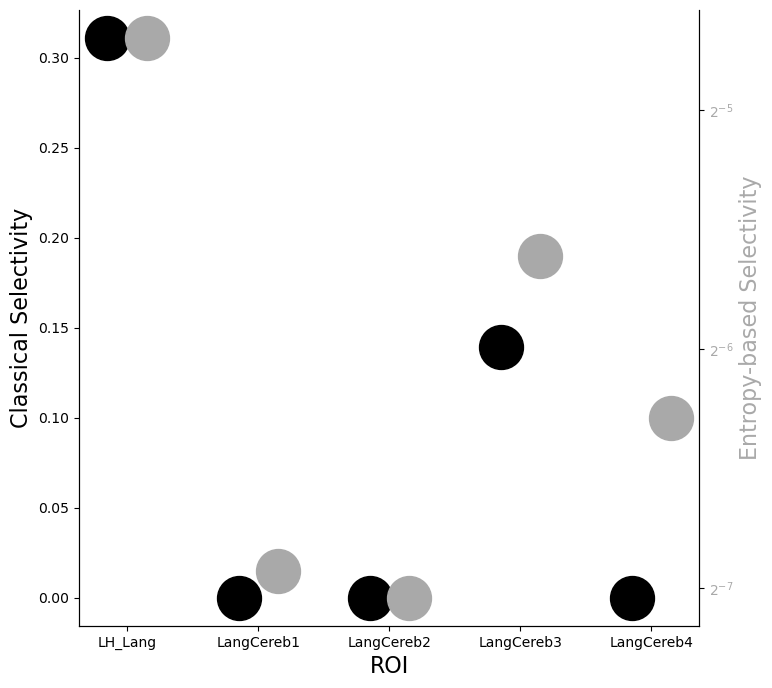

In [ ]:
figure = 'NONLING_FIGURE'
output = pd.read_csv('_data/'+figure+'/selectivity.csv',index_col=0)
output = output.loc[['LH_lang','Right_CrusI','Right_CrusI_Dentate','Right_CrusII_VIIb','Right_VIIIa'],:]

# plot
plt.ion()
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':True, 'top':False})
plt.rc('font',**{'family':'sans-serif'})
plt.rc('pdf', **{'fonttype':42})
fig,ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

x = np.arange(1,output.shape[0]+1)

color = 'black'
ax.set_xlabel('ROI', fontsize=16)
ax.set_ylabel('Classical Selectivity', color=color, fontsize=16)
ax.scatter(x-0.15, output.classical_selectivity, s=1000, color=color)
ax.tick_params(axis='y', labelcolor=color)
 
# save plot
PLOT_DIR = os.path.join('_plots',figure,'selectivity')
if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)
save_filename = PLOT_DIR+'/selectivity.pdf'
plt.savefig(save_filename,format='pdf',bbox_inches='tight',pad_inches=0.5) 

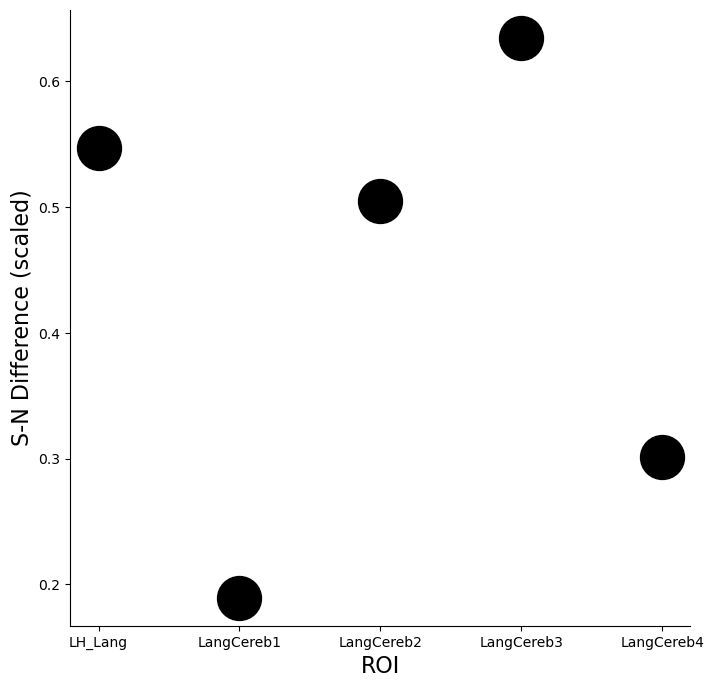

In [ ]:
# plot
plt.ion()
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rc('font',**{'family':'sans-serif'})
plt.rc('pdf', **{'fonttype':42})
fig,ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

x = np.arange(1,output.shape[0]+1)

color = 'black'
ax.set_xlabel('ROI', fontsize=16)
ax.set_ylabel('S-N Difference (scaled)', color=color, fontsize=16)
ax.scatter(x, output.SN_diff_scaled, s=1000, color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_xticks(ticks=[1,2,3,4,5], labels=['LH_Lang','LangCereb1','LangCereb2','LangCereb3','LangCereb4'], fontsize=10)
            
# save plot
PLOT_DIR = os.path.join('_plots',figure,'selectivity')
if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)
save_filename = PLOT_DIR+'/S-N_difference_scaled.pdf'
plt.savefig(save_filename,format='pdf',bbox_inches='tight',pad_inches=0.5) 